# Regularisation

## First - Synthesised data and Ridge Regression

In this first example, we will look at synthesised data and see how ridge regression compares with linear regression

Step 1: Import necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

Synthesize a dataset with make_regression (https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_regression.html) and split the data into training and testing sets.

I'm doing a bit of a fix here with random_state = 20. Also doing some rigging here with test_size=0.85 to demonstrate high variance. This sensitivity to the training data will be mitigated by increasing bias (the ridge regression penalty) to reduce the model variance.

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=20)  #Bit of a fix going on here with random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)  #Also doing some rigging here with test_size=0.85 to demonstrate high variance 

Initialize and train the Linear Regression and Ridge Regression models.
 
With Ridge Regression, use cross-validation for tuning lambda (Note: the word lambda is reserved by the Python language, so alpha is used instead)

Next, make predictions using both models and evaluate performance using Mean Squared Error (MSE)

In [3]:
lr = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

Linear Regression MSE (test set): 450.17
Ridge Regression MSE (test set): 448.33
Best alpha (lambda) for Ridge Regression: 1.00000


Next, let's have a look at the coefficients for both models. As expected, the penalty term has made the coefficients smaller (meaning they're slightly less sensitive to the inputs)

In [4]:
print("\nLinear regression coefficient:", lr.coef_)
print("Linear regression intercept:", lr.intercept_)

print("\nRidge regression coefficient:", rr_cv.coef_)
print("Ridge regression intercept:", rr_cv.intercept_)


Linear regression coefficient: [97.74253971]
Linear regression intercept: 1.4230434087617017

Ridge regression coefficient: [94.35834942]
Ridge regression intercept: 1.1514384996764129


### Plot the results

As expected the slope for ridge regression is less than that of linear regression. We can also see that the performance is better but that's been fixed above. In general, in simple cases like this, the ridge regression penalty just makes MSE worse

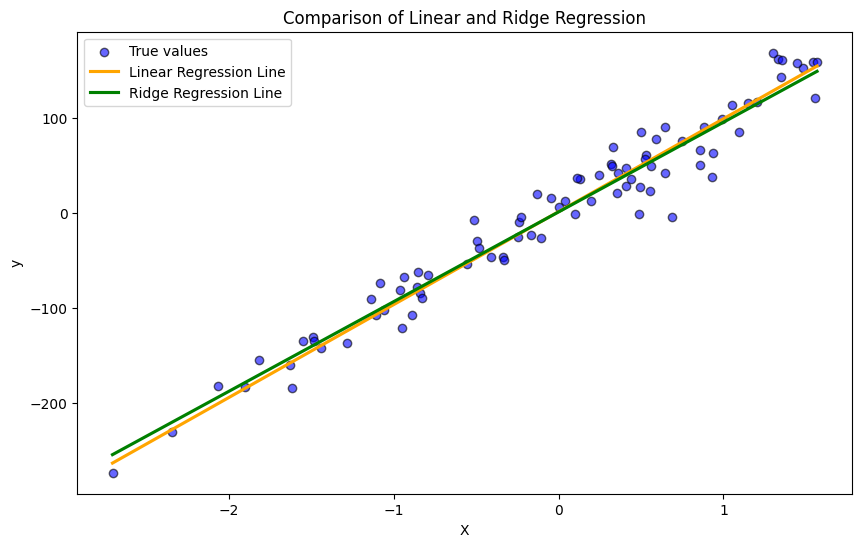

In [5]:
plt.figure(figsize=(10, 6))

# Scatter plot of the true values vs predicted values 
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='True values', edgecolors='k')

# Adding the Linear Regression Line 
sns.regplot(x=X_test.flatten(), y=lr_pred, scatter=False, color='orange', label='Linear Regression Line')

# Adding the Ridge Regression Line 
sns.regplot(x=X_test.flatten(), y=rr_pred, scatter=False, color='green', label='Ridge Regression Line')


plt.title('Comparison of Linear and Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## A more real-world example - Diabetes Dataset again

In this example, we'll look again at the Diabetes dataset in sklearn and the impact Ridge Regression has

Let's load the diabetes dataset and setup X and y. We've seen this before

In [6]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

#noise = np.random.normal(0, 40, size=y.shape)  # add random noise to the target
#y = y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Same as above, initialize and train the Linear Regression and Ridge Regression models (cross-validation for tuning lambda)

Next, make predictions using both models and evaluate performance using Mean Squared Error (MSE)

In [7]:
lr = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000


Next, let's have a look at the coefficients for both models. As expected again, the penalty term has made the coefficients smaller (meaning they're slightly less sensitive to the inputs). Also, the sum of the coefficients is significantly smaller

In [8]:
#Display the coefficients for both models
sumCoef=0
print("Ridge regression coefficients:")
for feature, coef in zip(X.columns, rr_cv.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print(sumCoef)

sumCoef=0
print("\nLinear regression coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print(sumCoef)

Ridge regression coefficients:
age: 42.856
sex: -205.494
bmi: 505.089
bp: 317.093
s1: -108.500
s2: -86.237
s3: -190.363
s4: 151.707
s5: 392.289
s6: 79.908
2079.5369844639936

Linear regression coefficients:
age: 37.904
sex: -241.964
bmi: 542.429
bp: 347.704
s1: -931.489
s2: 518.062
s3: 163.420
s4: 275.318
s5: 736.199
s6: 48.671
3843.1595098664247


### Plot the results

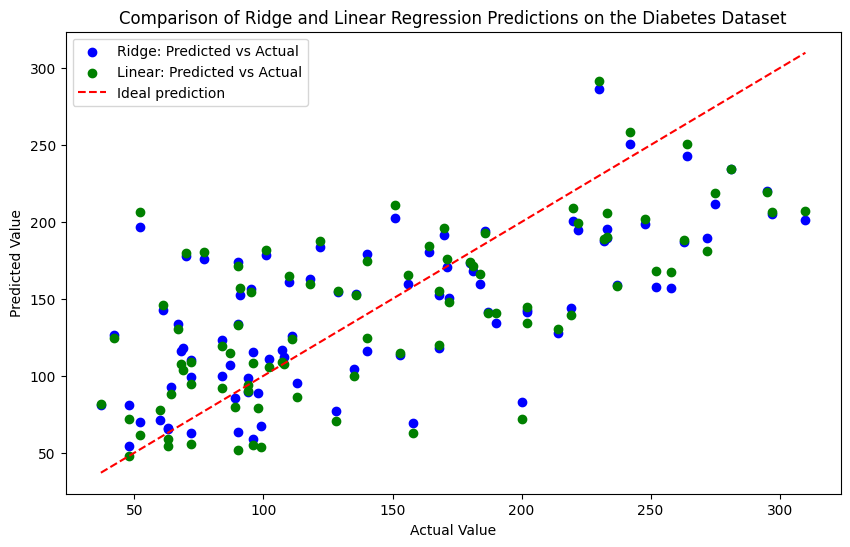

In [9]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for both models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge and Linear Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

## Let's look at Lasso Regularisation with the diabetes dataset

In [10]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 2798.19
Best alpha (lambda) for Lasso Regression: 0.10000


### Plot the results

Let's have a look at the results for all 3 models

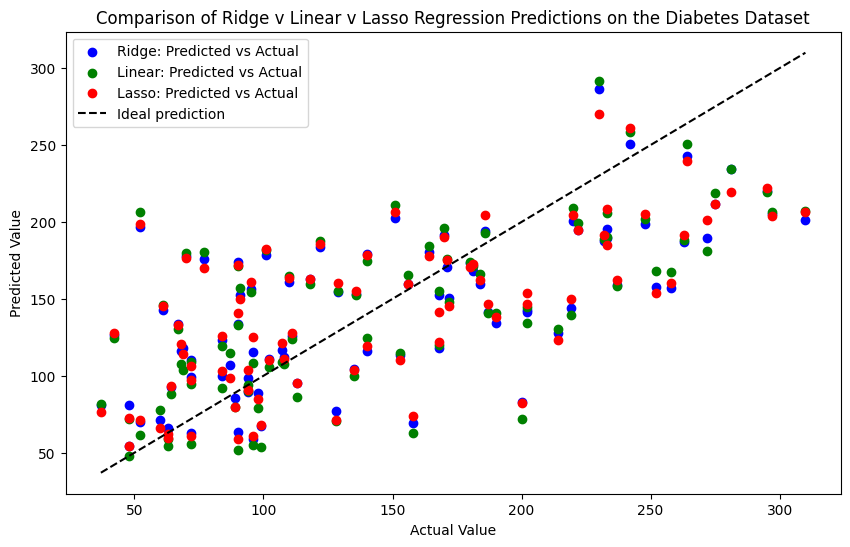

In [11]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for all 3 models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge v Linear v Lasso Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

Let's go back up to the top now and edit the noise parameter.

Ridge usually performs better when:

- The data has multicollinearity: Features are highly correlated, and ridge can prevent overfitting.
- The dataset has a large number of features (especially when there are more features than data): Regularization helps in controlling complexity, especially when there some irrelevant features.
- The dataset has noise: Ridge can reduce the model's sensitivity to noise.

So, let's introduce some noise

## Finally, Regularisation is built into many models in SKLearn - see below

penalty can be L1, L2 or ElasticNet which is a combination of L1 and L2 penalties

In [12]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

## ElasticNet

ElasticNet is a combination of the L1 and L2 penalties. It defaults to a 50/50 influence in sklearn

In [13]:
from sklearn.linear_model import ElasticNetCV

en_cv = ElasticNetCV(alphas=alphas, cv=5)
en_cv.fit(X_train, y_train)

# Make predictions
en_pred = en_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
en_mse = mean_squared_error(y_test, en_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso
print(f"ElasticNet Regression MSE (test set): {en_mse:.2f}")
print(f"Best alpha (lambda) for ElasticNet Regression: {en_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 2798.19
Best alpha (lambda) for Lasso Regression: 0.10000
ElasticNet Regression MSE (test set): 2877.86
Best alpha (lambda) for ElasticNet Regression: 0.00010


In [14]:
sumCoef=0
#Display the coefficients for all models
for feature, coef in zip(X.columns, rr_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("Ridge regression coefficient sum:")
print(sumCoef)

sumCoef=0
for feature, coef in zip(X.columns, lasso_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nLasso regression coefficient sum:")
print(sumCoef)

sumCoef=0
for feature, coef in zip(X.columns, en_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nElasticNet regression coefficient sum:")
print(sumCoef)

sumCoef=0
for feature, coef in zip(X.columns, lr.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nLinear regression coefficient sum:")
print(sumCoef)

Ridge regression coefficient sum:
2079.5369844639936

Lasso regression coefficient sum:
1796.9106376774469

ElasticNet regression coefficient sum:
2368.496552432735

Linear regression coefficient sum:
3843.1595098664247
